<a href="https://colab.research.google.com/github/pgiambuzzi/INF502/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP ASSIGNMENT:** You can solve this in pairs (2 students, no more than 2 students)

**How to subm it:**
* Follow the steps defined on this notebook
* Submit the Python Notebook files to your GitHub repository (same used for the other assignments), keeping the filenames
  - make sure you add your names and GitHub username in the file, so I can connect the pairs.
  - BOTH students in your group MUST SUBMIT the solution to your own GitHub, but they will be identical files. Please make sure you include the GitHub link to the assignment for both students in the chunk below, so I can easily switch from one GitHub to the other.

**Due date:** Nov 3, 2022 11:59 PM
I will evaluate the latest commit before the deadline

---


**Students' names:**

* Perry Giambuzzi (GitHub: https://github.com/pgiambuzzi)
* Eric Sjöstedt (GitHub: https://github.com/Sjostedt-eric)

---


# Part 1 - getting and exploring data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

In [ ]:
dataset = pandas.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')

### Step 3. Assign the dataset to a variable called `users` and use the `user_id` as the index

In [ ]:
users = dataset
user_id = users.set_index('user_id')

### Step 4. See the first 25 entries

In [208]:
users.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


### Step 5. See the last 10 entries

In [209]:
users.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


### Step 6. What is the number of observations in the dataset?

In [210]:
len(users)

943

### Step 7. What is the number of columns in the dataset?

In [ ]:
len(users.columns)

5

### Step 8. Print the name of all the columns.

In [ ]:
users.columns

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [ ]:
users['user_id'].index

RangeIndex(start=0, stop=943, step=1)

### Step 10. What is the data type of each column?

In [ ]:
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [ ]:
print(users.occupation)

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object


### Step 12. How many different occupations there are in this dataset?

In [ ]:
len(users.occupation.value_counts())

21

### Step 13. What is the most frequent occupation?

In [ ]:
users.occupation.describe().top

'student'

### Step 14. Summarize the DataFrame.

In [ ]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### Step 15. Summarize all the columns

In [ ]:
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [ ]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [ ]:
users.age.mean()

34.05196182396607

### Step 18. What is the age with least occurrence?

In [ ]:
least_age = users.age.value_counts().to_frame()
least_age[(least_age['age']==1)]

,age
7,1
66,1
11,1
10,1
73,1


# Part 2 - Visualization with Chipotle's Data

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset ([chipotle.tsv](https://github.com/chavesana/INF502-Fall22/blob/main/data/chipotle.tsv)). 

In [211]:
dataset2 = pd.read_csv('https://raw.githubusercontent.com/chavesana/INF502-Fall22/main/data/chipotle.tsv', sep='\t')
dataset2

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step 3. Assign it to a variable called `chipo`.

In [197]:
chipo = dataset2
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### Step 4. Show the average of the column `item_price`

In [198]:
chipo.item_price.mean()

7.464335785374297

### Step 5. Count the number of occurrences for `"Chicken Bowl"`

In [199]:
chknbwl = chipo.item_name.value_counts().to_frame()
chknbwl.item_name['Chicken Bowl']

726

### Step 6. Count the number of items with ``NULL``as the `choice_description`

In [200]:
chipo['choice_description'].isna().sum()

1246

### Step 7. Show the first 10 entries

In [201]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### Step 8. Create a bar plot of the top 5 items bought (total quantity per item)
Think simple... It is possible to do with what you know. No extras needed.


<function matplotlib.pyplot.show(*args, **kw)>

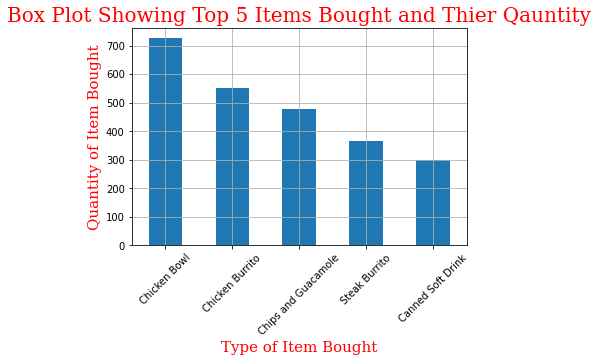

In [206]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

chipo.item_name.value_counts().head(5).plot.bar()
plt.xlabel("Type of Item Bought", c='r', fontdict = font2)
plt.xticks(rotation=45)
plt.ylabel("Quantity of Item Bought", c='r', fontdict = font2)
plt.title("Box Plot Showing Top 5 Items Bought and Thier Qauntity", c='r', fontdict = font1)
plt.grid()

plt.show

### Step 9. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis
(You can groupby and use the result)

<function matplotlib.pyplot.show(*args, **kw)>

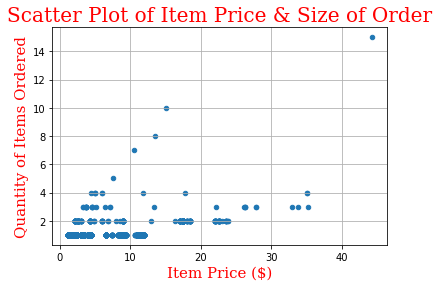

In [207]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

chipo.plot.scatter(x = "item_price", y = "quantity")

plt.grid()
plt.xlabel("Item Price ($)", c='r', fontdict = font2)
plt.ylabel("Quantity of Items Ordered", c='r', fontdict = font2)
plt.title("Scatter Plot of Item Price & Size of Order", c='r', fontdict = font1)

plt.show
